In [1]:
import numpy as np
import sklearn 
from sklearn.neighbors import KDTree
import time
from sklearn import metrics
import pandas as pd
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
import pylab as plt

In [2]:
# Uploadng my datasets
# Define a data frame with all my data  
FILE_PATH = r"../DATA/ML_datasets/Initial_setup"
IMAGE_FILE_PATH = r"images"

# Training data scores
train_data_score = np.loadtxt(FILE_PATH+'/DAVE_EVALUATION_10Example_train.txt', delimiter=',')
# Test data scores
test_data_score = np.loadtxt(FILE_PATH+'/DAVE_EVALUATION_10Example_test.txt', delimiter=',')

# Write a function to determine the arrays to plot

In [3]:
def calcListToPlot(data, idx):
    """Function 
    INPUT: 
    data: either training (train_data_score) or testing (test_data_score) data
    idx: index where to start (e.g. for number of trees 100:0, for 300:1, etc)
    OUTPUT:
    the list as an nparray (5,3) shape (5 cases, with tree depth, number of est. and accuracy)
    """
    list_trees = []
    for i in range(idx,25,5):
        list_trees.append(data[i])
    list_trees = np.array(list_trees)
    list_trees.resize((5,3))
    

    return list_trees

In [4]:
train_data_score.shape

(25, 3)

# This is to visualise the training data

In [5]:
train_data_score_accuracy = train_data_score[:,2]
train_data_score_depth = train_data_score[:,0]
train_data_score_numberofestimators = train_data_score[:,1]

In [6]:
list_100trees = []
for i in range(0,25,5):
    print train_data_score[i]
    list_100trees.append(train_data_score[i])
list_100trees = np.array(list_100trees)
list_100trees.resize((5,3))
print "Liste", list_100trees

[  4.         100.           0.59451515]
[  6.         100.           0.69448485]
[  8.         100.           0.76430303]
[ 10.         100.           0.82666667]
[ 12.         100.           0.88393939]
Liste [[  4.         100.           0.59451515]
 [  6.         100.           0.69448485]
 [  8.         100.           0.76430303]
 [ 10.         100.           0.82666667]
 [ 12.         100.           0.88393939]]


In [7]:
list100trees = calcListToPlot(train_data_score, 0)
list300trees = calcListToPlot(train_data_score, 1)
list500trees = calcListToPlot(train_data_score, 2)
list700trees = calcListToPlot(train_data_score, 3)
list900trees = calcListToPlot(train_data_score, 4)

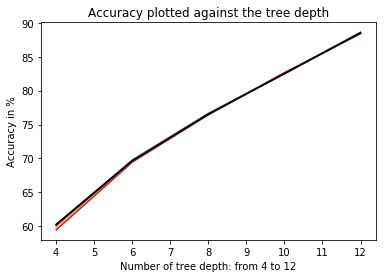

In [8]:
plt.plot(list100trees[:,0], list100trees[:,2]*100,"r")
plt.title("Accuracy plotted against the tree depth")
plt.xlabel("Number of tree depth: from 4 to 12"), plt.ylabel("Accuracy in %")
plt.plot(list300trees[:,0], list300trees[:,2]*100,"g")
plt.plot(list500trees[:,0], list500trees[:,2]*100,"y")
plt.plot(list700trees[:,0], list700trees[:,2]*100,"b")
plt.plot(list900trees[:,0], list900trees[:,2]*100,"k")
plt.show()

# Now visualise the testing data scores

In [9]:
test_list100trees = calcListToPlot(test_data_score, 0)
test_list300trees = calcListToPlot(test_data_score, 1)
test_list500trees = calcListToPlot(test_data_score, 2)
test_list700trees = calcListToPlot(test_data_score, 3)
test_list900trees = calcListToPlot(test_data_score, 4)

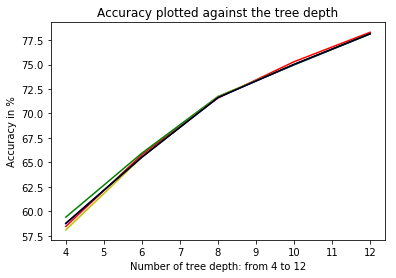

In [10]:
plt.plot(test_list100trees[:,0], test_list100trees[:,2]*100,"r")
plt.title("Accuracy plotted against the tree depth")
plt.xlabel("Number of tree depth: from 4 to 12"), plt.ylabel("Accuracy in %")
plt.plot(test_list300trees[:,0], test_list300trees[:,2]*100,"g")
plt.plot(test_list500trees[:,0], test_list500trees[:,2]*100,"y")
plt.plot(test_list700trees[:,0], test_list700trees[:,2]*100,"b")
plt.plot(test_list900trees[:,0], test_list900trees[:,2]*100,"k")
plt.show()

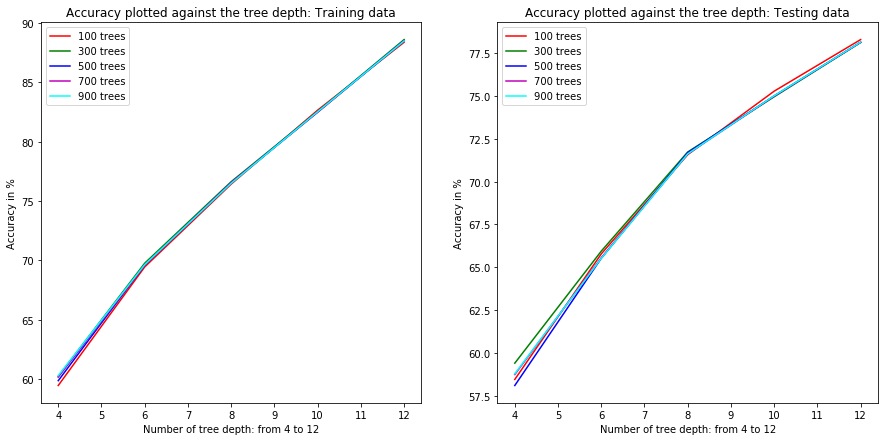

In [30]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1), 
plt.plot(list100trees[:,0], list100trees[:,2]*100,"r",label='100 trees')
plt.title("Accuracy plotted against the tree depth: Training data")
plt.xlabel("Number of tree depth: from 4 to 12"), plt.ylabel("Accuracy in %")
plt.plot(list300trees[:,0], list300trees[:,2]*100,"g", label='300 trees')
plt.plot(list500trees[:,0], list500trees[:,2]*100,"b",label='500 trees')
plt.plot(list700trees[:,0], list700trees[:,2]*100,"m",label='700 trees')
plt.plot(list900trees[:,0], list900trees[:,2]*100,"aqua", label='900 trees')
plt.legend()
plt.subplot(1,2,2), 
plt.plot(test_list100trees[:,0], test_list100trees[:,2]*100,"r",label='100 trees')
plt.title("Accuracy plotted against the tree depth: Testing data")
plt.xlabel("Number of tree depth: from 4 to 12"), plt.ylabel("Accuracy in %")
plt.plot(test_list300trees[:,0], test_list300trees[:,2]*100,"g",label='300 trees')
plt.plot(test_list500trees[:,0], test_list500trees[:,2]*100,"b",label='500 trees')
plt.plot(test_list700trees[:,0], test_list700trees[:,2]*100,"m",label='700 trees')
plt.plot(test_list900trees[:,0], test_list900trees[:,2]*100,"aqua",label='900 trees')
plt.legend()
plt.savefig(IMAGE_FILE_PATH+'/RF_validation.png')
plt.show()

# now check where I have the best accuracy in my data
Both training and test data

In [63]:
test_max_score = test_data_score[:,2].max()
print "Max test data score:", test_data_score[:,2].max()*100, "%"
train_max_score = train_data_score[:,2].max()
print "Max training data score:", train_data_score[:,2].max()*100, "%"

Max test data score: 78.30007251887504 %
Max training data score: 88.61818181818182 %


In [72]:
idx_test = np.argwhere(test_data_score[:,2]==test_data_score[:,2].max())
print "The best result is it:", test_data_score[idx_test]

The best result is it: [[[ 12.         100.           0.78300073]]]


In [73]:
idx_train = np.argwhere(train_data_score[:,2]==train_data_score[:,2].max())
train_data_score[idx_train]
print "The best result is it:", train_data_score[idx_train]

The best result is it: [[[ 12.         300.           0.88618182]]]


In [74]:
train_data_score

array([[4.00000000e+00, 1.00000000e+02, 5.94515152e-01],
       [4.00000000e+00, 3.00000000e+02, 6.02181818e-01],
       [4.00000000e+00, 5.00000000e+02, 5.98575758e-01],
       [4.00000000e+00, 7.00000000e+02, 6.01575758e-01],
       [4.00000000e+00, 9.00000000e+02, 6.02848485e-01],
       [6.00000000e+00, 1.00000000e+02, 6.94484848e-01],
       [6.00000000e+00, 3.00000000e+02, 6.97636364e-01],
       [6.00000000e+00, 5.00000000e+02, 6.96030303e-01],
       [6.00000000e+00, 7.00000000e+02, 6.95969697e-01],
       [6.00000000e+00, 9.00000000e+02, 6.96454545e-01],
       [8.00000000e+00, 1.00000000e+02, 7.64303030e-01],
       [8.00000000e+00, 3.00000000e+02, 7.66363636e-01],
       [8.00000000e+00, 5.00000000e+02, 7.65393939e-01],
       [8.00000000e+00, 7.00000000e+02, 7.65636364e-01],
       [8.00000000e+00, 9.00000000e+02, 7.65000000e-01],
       [1.00000000e+01, 1.00000000e+02, 8.26666667e-01],
       [1.00000000e+01, 3.00000000e+02, 8.25515152e-01],
       [1.00000000e+01, 5.00000

In [75]:
test_data_score

array([[4.00000000e+00, 1.00000000e+02, 5.84492180e-01],
       [4.00000000e+00, 3.00000000e+02, 5.93994279e-01],
       [4.00000000e+00, 5.00000000e+02, 5.80951287e-01],
       [4.00000000e+00, 7.00000000e+02, 5.87358101e-01],
       [4.00000000e+00, 9.00000000e+02, 5.87783352e-01],
       [6.00000000e+00, 1.00000000e+02, 6.57800484e-01],
       [6.00000000e+00, 3.00000000e+02, 6.59422771e-01],
       [6.00000000e+00, 5.00000000e+02, 6.55264359e-01],
       [6.00000000e+00, 7.00000000e+02, 6.55490556e-01],
       [6.00000000e+00, 9.00000000e+02, 6.55237215e-01],
       [8.00000000e+00, 1.00000000e+02, 7.15760392e-01],
       [8.00000000e+00, 3.00000000e+02, 7.17350559e-01],
       [8.00000000e+00, 5.00000000e+02, 7.16919880e-01],
       [8.00000000e+00, 7.00000000e+02, 7.16228168e-01],
       [8.00000000e+00, 9.00000000e+02, 7.16249431e-01],
       [1.00000000e+01, 1.00000000e+02, 7.52877570e-01],
       [1.00000000e+01, 3.00000000e+02, 7.49591827e-01],
       [1.00000000e+01, 5.00000